In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
import keras
from keras import Sequential
from keras.layers import Input,Dense,Flatten,Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator   # for data augmentation

from keras.utils import image_dataset_from_directory

from keras import Model



In [3]:
train = ImageDataGenerator(rescale = 1./255)

test = ImageDataGenerator(rescale = 1./255)

validation = ImageDataGenerator(rescale = 1./255)

# Generators

In [32]:
traing=train.flow_from_directory('/kaggle/input/plants-classification/train',target_size=(256,256),class_mode="sparse",batch_size=32)


Found 21000 images belonging to 30 classes.


In [33]:
testg=test.flow_from_directory('/kaggle/input/plants-classification/test',target_size=(256,256),class_mode="sparse",batch_size=32)

Found 6000 images belonging to 30 classes.


In [34]:
validationg=validation.flow_from_directory('/kaggle/input/plants-classification/val',target_size=(256,256),class_mode="sparse",batch_size=32)

Found 3000 images belonging to 30 classes.


# building Architecture

In [35]:
# Functional


inputs= Input(shape=(256,256,3))

x1=Conv2D(80,(3,3),strides=(2,2),padding="valid",activation='relu')(inputs)

x2=MaxPooling2D(pool_size=(2,2),strides=(2,2))(x1)

x3=Conv2D(60,(3,3),strides=(2,2),padding="valid",activation='relu')(inputs)

x4=MaxPooling2D(pool_size=(2,2),strides=(2,2))(x3)

x5=Conv2D(45,(3,3),strides=(2,2),padding="valid",activation='relu')(inputs)

x6=MaxPooling2D(pool_size=(2,2),strides=(2,2))(x5)

x7=Conv2D(20,(3,3),strides=(2,2),padding="valid",activation='relu')(inputs)

x8=MaxPooling2D(pool_size=(2,2),strides=(2,2))(x7)


flat=Flatten()(x8)

d1=Dense(80,activation='relu')(flat)

d2=Dense(60,activation='relu')(d1)

d3=Dense(45,activation='relu')(d2)

outputs=Dense(30,activation='softmax')(d3)



model1=Model(inputs=inputs,outputs=outputs)





In [36]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 127, 127, 20)      560       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 63, 20)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 79380)             0         
                                                                 
 dense_4 (Dense)             (None, 80)                6350480   
                                                                 
 dense_5 (Dense)             (None, 60)                4860      
                                                           

In [39]:
model1.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
history=model1.fit(traing,epochs=5,steps_per_epoch=21000//32,validation_data=validationg,validation_steps=3000//32)

Epoch 1/5
656/656 [==============================] - 183s 279ms/step - loss: 1.6163 - accuracy: 0.5154 - val_loss: 2.0506 - val_accuracy: 0.4556
Epoch 2/5
656/656 [==============================] - 185s 282ms/step - loss: 1.0206 - accuracy: 0.6865 - val_loss: 1.9873 - val_accuracy: 0.5071
Epoch 3/5
656/656 [==============================] - 194s 295ms/step - loss: 0.6172 - accuracy: 0.8048 - val_loss: 2.1562 - val_accuracy: 0.5413
Epoch 4/5
656/656 [==============================] - 189s 288ms/step - loss: 0.3935 - accuracy: 0.8708 - val_loss: 2.5365 - val_accuracy: 0.5588
Epoch 5/5
656/656 [==============================] - 190s 289ms/step - loss: 0.3117 - accuracy: 0.8933 - val_loss: 2.7479 - val_accuracy: 0.5558


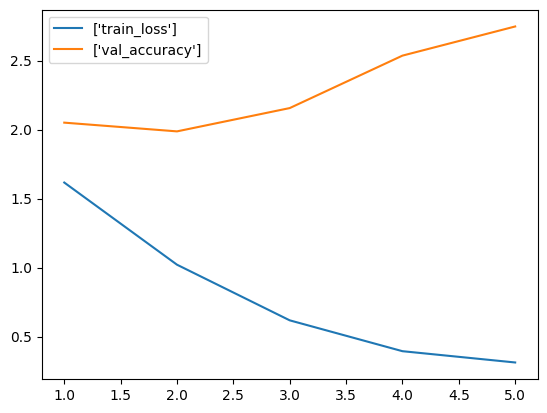

In [60]:
plt.plot(range(1,6),history.history['loss'],label=['train_loss'])

plt.plot(range(1,6),history.history['val_loss'],label=['val_loss'])

plt.legend()

In [58]:
import matplotlib.pyplot as plt